In [106]:
import numpy as np
import skimage as sk
import pandas as pd 
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import plot_matches, CENSURE, BRIEF, match_descriptors




In [118]:
def visualize_matches(image1, image2, XYXY):

    # Separating columns of the matching points
    X1 = XYXY[:,0]
    Y1 = XYXY[:,1]
    X2 = XYXY[:,2]
    Y2 = XYXY[:,3]

    # Getting image dimensions
    Height = max(image1.shape[0], image2.shape[0])
    Width = image1.shape[1] + image2.shape[1]
    numColors = image1.shape[2]

    # Creating image to visualize matches
    newImg = np.zeros((Height, Width, numColors))
    newImg[0:image1.shape[0], 0:image1.shape[1],:] = image1
    newImg[0:image2.shape[0], 0+image1.shape[1]:, :] = image2

    # Displaying points and connecting lines
    shiftX = image1.shape[1]
    plt.imshow(newImg)
    plt.plot(X1, Y1,'r*')
    plt.plot(X2 + shiftX, Y2,'r*')
    for i in range(0,X1.shape[0]):
        plt.plot((X1[i],X2[i] + shiftX),(Y1[i],Y2[i]))
    return

def get_ground_truth(dataname):
    datanum = -1
    if dataname == "notre_dame":
        datanum = 1
    elif dataname == "episcopal_gaudi":
        datanum = 2
    elif dataname == "mount_rushmore":
        datanum = 3
    path = "data/dataset_"+str(datanum)+"_"+dataname+"/matches.csv"
    gt_matches = np.loadtxt(path)
    return gt_matches

def get_estimated_matches(dataname):
    datanum = -1
    if dataname == "notre_dame":
        datanum = 1
    elif dataname == "episcopal_gaudi":
        datanum = 2
    elif dataname == "mount_rushmore":
        datanum = 3
    path = "data/dataset_"+str(datanum)+"_"+dataname+"/matches_estimated.csv"
    estimated_matches = np.loadtxt(path)
    return estimated_matches

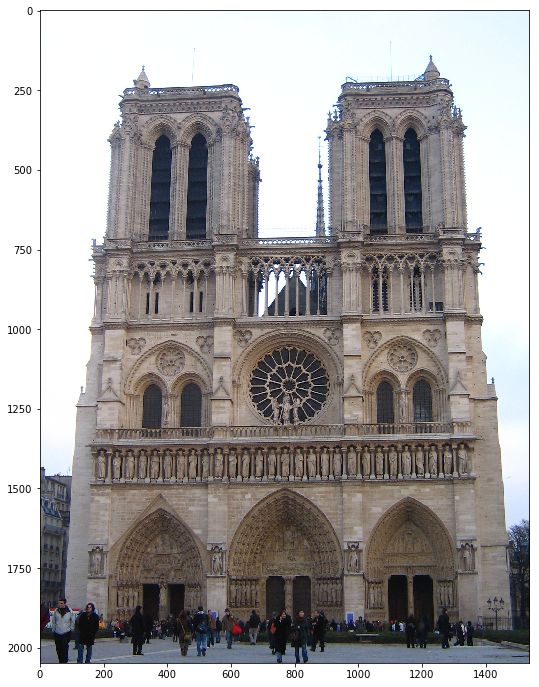

In [119]:
width = 12
height = 12

plt.figure(figsize=(width, height))


img1 = imread('data/dataset_1_notre_dame/image_1.jpg')

plt.imshow(img1)
plt.show()

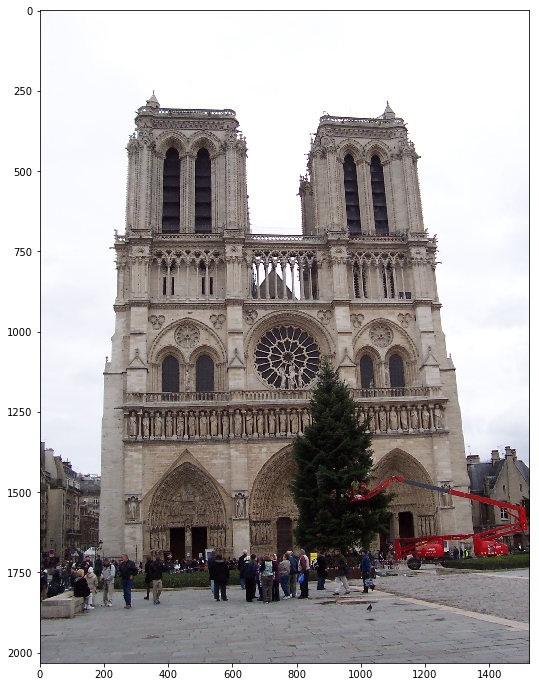

In [120]:

plt.figure(figsize=(width, height))


img2 = imread('data/dataset_1_notre_dame/image_2.jpg')

plt.imshow(img2)
plt.show()

## Visualize ground truth matches

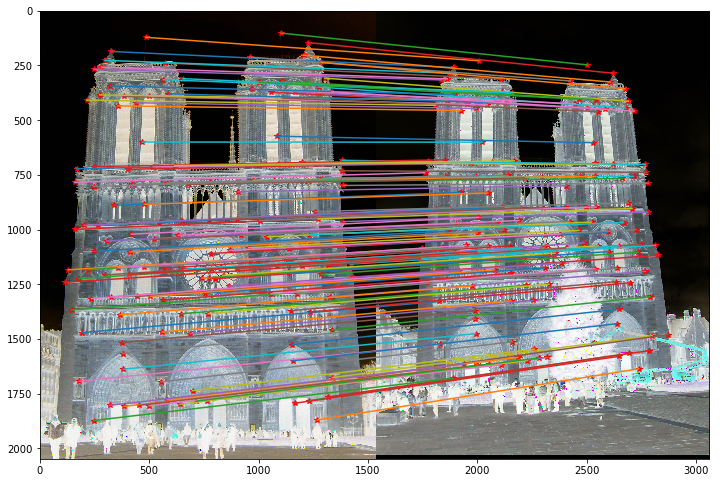

In [121]:
notre_dame_ground_truth = get_ground_truth("notre_dame")


plt.figure(figsize=(width, height))

visualize_matches(img1,img2,notre_dame_ground_truth)
plt.show()


## Keypoint Detection

first, convert the images to grayscale (insert reasoning for this). Then use the CENSURE (insert citation?) keypoint detector to extract the keypoints in the images.

In [111]:
img1_gray = rgb2gray(img1)
img2_gray = rgb2gray(img2)

In [112]:
censure = CENSURE()

censure.detect(img1_gray)

kp1 = censure.keypoints

censure.detect(img2_gray)

kp2 = censure.keypoints

## Feature Extraction
then, using the keypoints extract features from the images

In [ ]:
brief = BRIEF()
brief.extract(img1_gray,kp1)
img1_feats = brief.descriptors
brief.extract(img2_gray,kp2)
img2_feats = brief.descriptors

## Feature Matching

In [114]:
matches = match_descriptors(img1_feats,img2_feats)

In [115]:
img1_matchpoints = kp1[matches[:,0]]
img2_matchpoints = kp2[matches[:,1]]


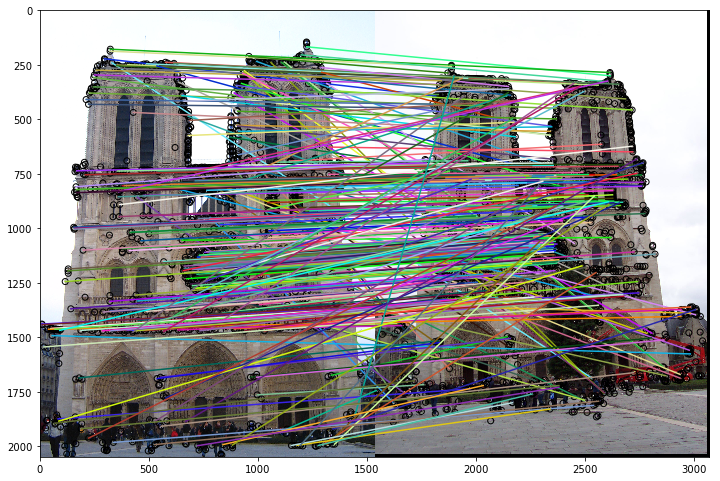

In [116]:
width = 12
height = 12

plt.figure(figsize=(width, height))

plt.gray()
plot_matches(plt,img1,img2,kp1,kp2,matches)
plt.show()